In [5]:
!pip install wordcloud

import wordcloud
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded_file = files.upload()

Saving All data.xlsx to All data.xlsx


In [ ]:
FILE_CONTENTS = ''
df = pd.read_excel('All data.xlsx')
for row in df['Comment']:
    row = str(row) + ' '
    FILE_CONTENTS += str(row)

In [ ]:
#@title UNINTERSTING WORDS
UNINTERESTING_WORDS = ['aja', 'kominfo', 'ga', 'lu', 'ada', 'yg', 'gak', 'di', 'pak', 'lagi', 'bisa', 'blokir', 'yang', 'apa', 'ya', 'guna', 'nya', 'woi', 'ini', 'menteri', 'orang', 'jadi', 'makan', 'dan', 'kalian', 'mentri', 'negara', 'lah', 'paling', 'tuh', 'pada', 'sih', 'rakyat', 'kok', 'blok', 'lo', 'semua', 'nih', 'mending', 'itu', 'ngerti', 'tidak', 'mau', 'isinya', 'si', 'kalo', 'plate', 'malah', 'tau', 'noh', 'gk', 'klo', 'anak', 'doang', 'mana', 'banget', 'dasar', 'sana', 'bener', 'biar', 'pake', 'ngga', 'ngapain', 'tu', 'saya', 'bikin', 'masyarakat', 'cuma', 'deh', 'urusin', 'online', 'emang', 'mulu', 'juga', 'dia', 'jangan', 'it', 'bek', 'bang', 'kali', 'bapak', 'kerjaan', 'banyak', 'gw', 'sampai', 'kayak', 'ngurus', 'g', 'udah', 'duit', 'gini', 'suruh', 'jaga', 'keamanan', 'satu', 'kang', 'sama', 'kenapa', 'gmn', 'dah', 'y', 'lg', 'info', 'jgn', 'anda', 'diri', 'sudah', 'muka', 'pas', 'mereka', 'tapi', 'dulu', 'hanya', 'bilang', 'kerjanya', 'main', 'kaya', 'kapan', 'ngeblok', 'makin', 'udh', 'pernah', 'jual', 'johnny', 'kalau', 'ngabisin', 'dijual', 'kata', 'mu', 'hidup', 'lebih', 'bukan', 'tukang', 'solusi', '=', 'u', 'indonesia', 'sanggup', 'kaga', 'lupa', 'disuruh', 'domino', 'sini', 'lalu', 'admin', 'global', 'an', 'urusan', 'salah', 'melihat', 'sendiri', 'sob', 'dikira', 'oleh', 'maen', 'wah', 'kata2', 'ke', 'baik', 'selain', 'ngurusin', 'saja', 'mendingan', 'berguna', 'demi', 'oh', 'isi', 'wa', 'oi', 'bapak2', 'sebagai', 'warga', 'benerin', 'percuma', 'bro', 'koar', 'masuk', 'tugas', 'terus', 'dari', 'dripada', 'sekarang', 'bet', 'vpn', 'wajar', 'kebun', 'dgn', 'buat', 'tp', 'no', 'privasi', 'kan', 'punya', 'jagan', 'mah', 'password', 'ni', 'masa', 'setelah', 'terburuk', 'dong', 'pw', 'daripada', 'bagaimana', 'minimal', 'pribadi', 'isu', 'masyrakat', 'johny', 'hal', 'tpi', 'belom', 'dlu', 'dikit', 'indo', 'cari', 'lee', 'tiba', 'langganan', 'lain', 'dana', 'woiii', 'hacker', '😂', 'kemenkominfo', 'nik', 'kita', 'masih', 'judi', 'bjorka', 'tolong', 'gimana', 'kami', 'kementrian', 'untuk', 'dengan', 'jawab', 'game', 'teknologi', 'digital', 'aman', 'tanggung', 'atau', '😂😂😂', 'harus', 'mencuri', 'being', '😂😂', 'anggaran', 'jokowi', 'menyerang', 'situs', 'aplikasi', 'karena', 'kebocoran', 'johnnyplate', 'sim', 'gua', 'ente', 'akun', 'minta', 'gitu', 'kek', 'uang', 'hack', 'penting', 'datanya', 'daftar', 'org', 'min', 'higgs', 'dalam', 'wkwkwk', 'kementerian', 'open', 'baru', 'higgsdominoisland', 'siapa', 'lembaga', 'wkwk', 'eh', '1', 'paham', 'jelas', 'source', 'sekali', 'sampe', 'hari', 'pemerintah', 'kau', 'para', 'jabatan', 'sering', 'katanya', 'pse', 'woy', '🤡', 'kasih', 'kena', 'pajak', 'presiden', 'akan', 'pasti', 'kadang', 'joni', 'coba', 'mampu', 'nyuruh', 'tahun', 'drop', 'turu', 'bayar', 'kah', 'sangat', '🤣', 'masalah', 'd', 'nggak', 'aku', 'panik', '🔥', 'urus', 'iya', 'giliran', 'komen', 'ekonomi', 'apakah', 'cuman', 'card', '😢', 'registrasi', 'padahal', 'sistem', 'loh', 'mungkin', 'liat', 'slot', 'mohon', 'bidang', 'pakai', 'harusnya', 'kk', 'usah', 'nomor', 'seperti', 'makanya', 'informasi', '😂😂😂😂', 'ama', 'negeri', 'sulit', 'ig', 'apaan', 'tak', 'cara', 'nyerang', 'amat', 'bgt', 'maaf', 'nanti', 'belum', 'muda', 'beli', 'tidur', 'pejabat', '👏', 'rumah', 'ko', 'besar', 'tangan', 'gunanya', 'memang', 'menkominfo', 'perlu', 'nyalahin', 'kepada', 'dapat', 'selamat', 'cyber', 'jd', 'wkwkw', 'ahli', 'papa', 'pinter', 'the', 'trus', 'otp', 'hp', 'turun', 'begini', 'ternyata', 'menterinya', 'bisanya', 'ulang', 'dora', 'heran', 'percaya', 'diam', 'konoha', 'menjaga', 'yaa', 'kartu', 'kalah', 'yah', 'ngomong', 'kasian', 'pinjol', 'tutup', 'search', 'sekelas', 'diblokir', 'lulusan', 'tiap', 'bakal', 'orang2', 'bagus', 'ae', 'kompeten', 'bos', 'hbd', 'baca', 'engine', 'adalah', 'masing', 'kagak', 'ku', 'gausah', 'sesuai', 'dunia', 'sadar', 'tentang', 'nama', 'kamu', 'serang', 'security', 'serius', 'elit', 'takut', 'tangkap', 'diem', 'om', 'jon', 'gue', 'komentar', 'internet', 'menjadi', 'tanya', 'partai', 'inovasi', 'hahaha', 'soal', 'saat', 'titipan', 'instansi', 'ktp', 'yes', 'dr', 'apalagi', 'pengen', 'bukannya', 'ayo', 'dimana', 'tanpa', 'karna', 'bagi', 'disini', 'ketua', 'pun', 'kinerja', 'zuma', 'hasil', 'you', 'kebanyakan', 'semoga', 'dapet', 'informatika', 'wkwkwkwk', 'luar', 'terima', 'ngakak', 'sarjana', 'butuh', 'piring', 'suka', 'kecil', 'jika', 'tinggal', 'berapa', 'susah', 'dek', 'maju', 'bocorrr', 'lepas', 'hackernya', 'to', 'mata', 'atas', 'rasa', 'penduduk', 'pasword', 'beliau', 'eeffando', 'dll', 'jdi', 'pintar', 'bidangnya', 'nomer', 'warnet', 'lempar', 'diganti', 'berani', 'buka', 'langsung', 'se', 'report', 'biasa', 'digaji', 'benar', 'p', 'ibu', '🤡🤡🤡', 'pegawai', 'hancur', 'kasus', '2', 'ketika', 'keluarga', 'agar', 'manusia', 'kurang', 'situ', 'tinggi', 'enak', 'nge', 'lawan', 'skrg', 'boleh', 'bangsa', 'bergerak', 'mentrinya', 'nanya', 'island', 'tahu', 'pa', 'yuk', 'jg', 'nodrop', 'sobat', 'secara', 'selalu', 'ikut', 'harga', 'kebobolan', 'bobol', 'halo', 'pengguna', 'asal', 'maling', 'in', 'yakin', 'tutor', 'janji', 'berkedok', 'cuan', 'saran', 'soalnya', 'g20', 'pihak', 'generasi', 'gampang', 'emg', 'website', 'terjadi', 'netizen', 'namanya', 'kira', 'haha', 'sibuk', 'skill', '🗿', 'fungsi', 'pemerintahan', 'begitu', 'bertanggung', 'pesan', 'magang', 'swiper', '🤣🤣🤣', 'terlalu', 'parah', 'up', 'simcard', 'tersebut', 'lihat', 'komputer', 'hebat', 'komunikasi', 'bahkan', 'bahas', 'pegang', 'ah', 'bbm', '13', 'chip', 'berita', 'perjudian', 'kemarin', 'pelawak', 'menjabat', 'katakan', 'gantimenkominfo', 'aturan', 'keras', 'tetap', 'terhormat', 'polisi', 'hapus', 'wakanda', '3', 'apa2', 'sedang', 'korupsi', 'bulan', 'halah', 'umur', 'a', 'jago', 'berhenti', 'ndak', 'melindungi', 'like', 'bs', 'lama', 'mengundurkan', 'heker', 'keliatan', 'tdk', 'database', 'ekomaul69', 'web', 'rugi', 'segala', 'prestasi', 'acara', 'mas', '😂😂😂😂😂', 'tambah', 'program', 'jhony', 'belajar', 'operator', 'aj', 'berkompeten', 'wotehf', 'peduli', 'jalan', 'beberapa', 'ntar', 'media', 'betul', 'kebijakan', 'urat', 'depan', 'cocok', 'nonton', 'asli', 'v', 'permainan', 'tenang', 'balik', 'gagal', 'gmna', 'cor', 'pantes', 'bekerja', 'sekalian', 'utk', 'e', 'sebenarnya', 'spam', 'membuat', 'google', 'pula', 'jadinya', 'hati', 'steam', 'selama', 'video', 'negri', 'whatsapp', 'habis', 'seharusnya', 'islands', 'wkwkwkw', 'rame', 'dikatain', 'donquixote1family', 'jebol', 'segera', 'caranya', 'apk', 'bin', 'out', 'gada', 'statement', 'kualitas', 'update', 'emng', 'hahahaha', 'anjir', '🤓', 'masing2', 'cuci', 'kerjaannya', 'bocorin', 'sebelum', 'login', 'foto', 'sm', 'jurusan', 'ngopi', 'jhonny', 'meretas', 'memblokir', 'ditangkap', 'yo', 'cek', 'kak', '🙏', 'sebenernya', 'maklum', 'berarti', 'tv', 'publik', 'sumpah', 'engga', 'retas', 'hadeh', 'kantor', 'apbn', 'megang', 'ngak', 'buang', 'gara', 'salam', 'ngasih', 'ngeblokir', 'jutaan', 'gatau', 'nyari', 'yaaa', 'dalem', 'nah', 'dont', 'elite', 'bae', 'mahal', 'maksa', 'bersama', 'merasa', 'anggota', 'keluar', 'innovation', 'gaada', 'data2', 'tanah', 'tugasnya', 'kerjasama', 'salahin', 'pakek', 'kyk', 'cepat', 'melek', 'pemain', 'korban', 'supaya', 'dikasih', 'termasuk', 'masi', 'seluruh', 'hoax', 'blm', 'pemilu', 'solusinya', '🙌', 'pura', 'ny', 'knp', 'bocorrrr', 'pensiun', 'institusi', 'slebewwwww', 'dijaga', 'bingung', 'kesalahan', 'sms', 'word', 'diserang', 'damargumilang', 'pemimpin', 'rakyatnya', 'triliunan', 'pencurian', 'perusahaan', 'terimakasih', 'resign', 'server', 'ngaku', 'please', 'sma', 'siap', '🤡🤡🤡🤡', 'ingin', 'be', 'beneran', 'i', 'melakukan', 'kacau', 'so', 'kayaknya', 'kayanya', 'sehat', 'dpr', 'yak', 'politik', 'happy', 'birthday', 'smua', 'high', 'lgi', 'haram', 'sabar', 'minus', 'kepala', 'jualan', 'petisi', 'nambah', 'yok', 'bsa', 'of', 'boss', 'waktu', 'tenan', 'gila', 'semangat', 'ad', 'pakk', '2024', 'btw', 'ingat', 'segitu', 'mikir', 'masak', 'milih', 'miliar', 'jabat', 'kabar', 'denger', 'akses', 'block', 'setiap', 'kemana', 'kursi', 'pilih', 'rahasia', 'dri', 'seorang', 'bahwa', 'anti', 'wong', 'diretas', 'diisi', 'puncak', 'jawabnya', 'hengker', 'ajg', 'mieczyslawjs', 'maka', 'jujur', 'gara2', 'alasan', 'menggunakan', 'mudah', 'beres', 'rutin', 'trs', 'ngehack', 'duduk', 'dpt', '🔥🔥', 'disana', 'bantu', 'elu', 'kasi', 'semuanya', 'cucu', 'disalahin', 'era', 'naik', 'inget', '👏👏👏', 'uda', 'divisihumaspolri', 'akibat', 'lewat', 'otaknya', 'sdm', 'gan', 'swasta', 'gg', '🔥🔥🔥', 'sokan', 'ra', 'toh', 'ngk', 'peraturan', 'allah', 'ketir', 'kesebar', 'hilang', 'dibayar', 'modal', 'hecker', 'hooh', 'cm', 'jony', 'guys', 'drama', 'org2', 'kemampuan', 'juta', 'buruk', 'setuju', 'pd', 'njir', 'mantap', 'skrng', 'bochor', 'tetep', 'abis', 'keknya', '🤣🤣', 'mental', 'kelen', 'kemaren', 'hasilnya', 'pertemuan', '😍', 'jauh', 'iki', 'ketar', 'omong', 'angkat', 'lho', 'kuat', 'lol', 'pencitraan', 'digitalisasi', 'kesini', 'profesional', 'gapunya', 'amerika', 'sryadwisptraaa', 'cukup', 'merugikan', 'cie', 'loe', 'sambo', 'kembali', 'petinggi', 'pelanggan', 'tim', 'ibarat', 'jaringan', 'sat', 'akhirnya', 'klarifikasi', 'nitip', 'ajah', 'sosial', 'my', 'sy', '0', 'gamau', 'dibobol', 'dihujat', 'hah', 'genteng', 'sambil', 'ajaa', 'bener2', 'sungguh', 'jaman', 'blog', 'tuntut', 'lumayan', 'napa', 'gaes', 'we', 'ahlinya', 'tren', 'bssn', 'literasi', 'dal4f', 'penipuan', '303', 'dibilang', 'hehe', 'blokirhigsdominoisland', 'bokep', 'koin', 'ri', 'sengaja', 'orng', 'diluar', 'pulang', 'bisnis', 'tempat', 'hukum', 'postingan', 'viralkan', 'dukung', 'kgk', 'b', 'sedikit', 'sekolah', 'telah', 'gtu', 'bocornya', 'andre90es', 'ampe', 'pertahanan', 'bocah', 'ngomongin', 'dibuat', 'anjay', 'posting', 'suatu', 'kecolongan', 'pns', 'nicktgrar', 'bakso', 'hingga', 'perampokkan', '🤭', 'inilah', 'playstore', 'buang2', 'lainnya', 'donk', 'iklan', 'paypal', 'tuhan', 'sd', 'bg', 'bales', 'semakin', 'prabowo', 'izin', 'apapun', 'sampek', 'triliun', 'hujatan', 'porno', 'teros', 'nyambung', 'sdh', 'tunjangan', 'malunya', 'ketawa', 'maksudnya', 'kosong', 'ngab', 'pengalihan', 'aduh', 'jatah', 'ilmu', 'kumpulan', 'lawack', 'said', 'wahai', 'koq', '40', 'ygy', 'sir', 'nggk', 'stand', 'rekrut', 'vs', 'is', 'karyawan', 'bocorrrrr', 'lwinkyawcc', 'tiongkok', 'ultah', 'menang', 'ilegal', '5', 'merusak', 'ngerasa', 'unsur', 'alhamdulillah', '😮', 'x', 'akhirat', 'sii', 'mulai', 'dipake', 'wajib', 'kejahatan', 'pembunuhan', 'bnyk', 'belikan', 'contoh', 'gimna', 'berharap', 'pindah', 'pantesan', 'ban', 'dih', 'taik', 'twitter', 'woii', 'sejak', 'beda', 'komennya', 'facebook', 'sebuah', 'cuk', 'grup', 'drpd', 'ilang', '🤡🤡', 'curi', 'doank', 'ipunkgenk07', 'jawaban', 'ampun', 'enggak', 'bnyak', 'melalui', 'belakang', 'miris', 'ye', 'model', 'sembuh', 'temen', 'top', 'jan', 'link', 'orangorang', 'namun', 'dihack', 'batu', 'disitu', 'chat', 'pikir', 'ajalah', 'dg', 'cerdas', 'china', '👏👏', '👍', 'sudahlah', 'are', 'lindungi', 'buah', 'krn', 'perbaiki', 'tol', 'ehh', 'tambal', 'awal', 'dicuri', 'rendah', '2022', 'make', 'bangga', 'jalur', 'pekerjaan', 'blunder', 'opo', 'tanggungjawab', 'pc', 'sweeper', 'on', 'seluler', 'sono', 'dirinya', 'banteng', 'ilhampkc', 'memesedap', 'dipimpin', 'orang²', 'bpk', 'nda', 'lucunya', 'bebas', 'dihapus', 'woyy', 'jga', 'bentuk', 'fungsinya', 'sedangkan', 'peserta', 'lahh', 'serta', 'rusak', '10', 'la', 'cip', 'pemuda', 'ngamanin', 't', 'haduh', 'deck', 'kinerjanya', 'dua', 'bahaya', 'tod', 'gaming', 'niat', 'dut', 'tindakan', 'hujat', 'pke', 'pusing', 'wkwkwkkw', 'kakek', 'serangan', 'pala', 'kadangkadang', 'tutorial', 'tembok', 'mbok', 'dibidangnya', 'real', 'integritas', 'm', 'parpol', 'jepang', 'loker', 'email', 'provider', 'dokumen', 'john', 'alias', 'tangkep', 'republik', 'tindak', 'tiktok', 'bandar', 'macam', 'msh', 'cepet', 'mikirin', 'ahh', 'ampuh', 'produk', 'download', '12', 'wkwkkw', 'memiliki', 'cuy', 'ajak', 'gratis', 'bakalan', 'sipaling', 'pda', 'gajih', 'pekerja', '❤️', 'jngn', 'k', 'pantas', 'dengar', 'besok', 'terutama', 'data²', 'mampus', 'if', 'penuh', 'one', 'surat', 'bank', 'piye', 'dibidang', 'level', 'mencari', 'gunakan', 'kolom', 'terkait', 'hey', 'pakde', '😌', 'ketimbang', 'orangnya', 'kudu', 'duh', 'mengatasi', 'bully', 'tekhnologi', 'ribet', 'segini', 'jagain', 'bapa', 'putus', 'ketemu', 'dagelan', '“', 'ambil', 'woe', 'mengerti', 'iso', 'excel', 'capek', 'siber', 'imazurea', 'blokir2', 'ngeles', 'viral', 'biarkan', 'dm', 'terhadap', 'anak2', 'lancar', 'sesuatu', 'bareng', 'player', 'keamanannya', 'waktunya', 'kecewa', 'for', 'ikutan', 'bocor2', 'oalah', 'pak😂', 'sia', 'biasanya', 'oknum', 'kukira', 'network', 'penyadapan', 'percobaan', 'jawa', 'tengah', 'kemenkumhamri', 'menurut', 'telegram', 'per', 'djaikominfo', 'hahahahaha', 'time', 'bawah', 'legal', '😅', 'merdeka', 'fb', 'gatotkaca', 'mo', 'ancur', 'komenan', 'jabatannya', '😂😂😂😂😂😂', 'l', 'salahkan', 'bagian', 'film', 'habisin', '🤡🤡🤡🤡🤡', 'perasaan', 'kerjaanya', 'kabeh', 'regis', 'menyalahkan', 'telpon', 'kawan', 'hekel', 'rudiantara', 'aje', 'keminfo', 'kira2', 'buset', 'masingmasing', 'rajin', 'post', 'dirumah', 'adu', 'wae', 'nt', 'awokawok', 'tobat', 'ora', 'terbaik', 'kl', 'hahahah', 'bilangin', 'sosoan', 'bssnri', 'hackers', 'wow', 'bertanya', 'blokar', 'masalahnya', 'background', 'kepercayaan', 'dilakukan', 'membantu', 'latar', 'situs2', 'rupiah', 'sebar', 'suara', 'gpp', 'ngeblock', 'makasih', 'selesai', 'agen', 'nyatanya', 'waras', 'santai', 'platform', 'mampir', 'big', 'diurus', 'rombak', 'sekian', 'muncul', 'berantakan', 'ikhlas', '🔥share', 'berencana', 'kudus', 'httpsmfacebookcomstoryphpstoryfbid4484834648228370id100001056385432', 'ganjarpranowo', 'kemenkesri', 'untung', 'datang', 'sab', 'bu', 'konten', 'milik', 'ujung', 'alamat', 'balas', 'buktinya', 'kejadian', 'mandi', 'app', 'wes', 'woyyy', 'bngt', 'puluhan', 'gatot', 'minim', 'wni', 'lagian', 'blokk', 'apaa', 'pecus', 'bapack', 'gajinya', 'bentar', 'berkata', 'kuliah', 'atap', 'explorer', 'tersebar', 'ngang', 'pegawainya', 'itulah', 'ngurusi', 'dihimbau', 'taunya', 'sebulan', 'cape', 'pembalut', 'saling', 'hallo', 'sihh', 'ngejaga', 'keahlian', 'kemanan', '13m', 'kesana', 'kom', 'gonta', '🤡🤡🤡🤡🤡🤡🤡🤡', 'sering2', 'jngan', 'jarang', 'nanganin', 'ngemis', 'nasdem', 'ilhamramadhantamba', 'saniahdfhs', 'nyaman', 'why', 'rakyatmu', 'listyosigitprabowo', 'higs', 'diakses', 'gelar', 'dijamin', 'kepentingan', 'pinjaman', 'ia', 'mengandung', 'ajh', 'sarmento8771', 'jajaran', 'plat', 'sewa', 'curiga', 'ginian', 'cap3hidup', 'httpschngitxz97fyfc7v', 'kemalingan', 'tebal', 'rasanya', 'agak', 'privacy', 'identitas', 'can', 'bicara', 'dh', 'amanah', 'ki', 'terdaftar', 'sebelumnya', 'live', 'pura2', 'berbenah', 'diambil', 'zona', 'w', 'windows', 'nunggu', 'hayo', 'tiba2', 'its', 'abisin', 'nyata', 'jakarta', 'udahlah', 'sehingga', 'alat', 'dipegang', 'n', 'install', 'mimpin', 'pro', 'ngatasin', 'perlindungan', 'kebobol', 'blom', 'full', 'posisi', 'berasa', 'nerima', 'tunggu', 'mimpi', 'coding', 's', 'sayapnya', 'nyimpen', 'pimpinan', 'komintod', 'ayam', 'dipenjara', 'oke', 'pernyataan', 'pasal', 'satunya', 'sisi', '😢😢😢', 'melawak', 'telepon', 'ngong', 'cat', 'hrs', 'sistemnya', 'ha', 'o', 'marah', 'artinya', 'baby', 'dirugikan', 'mnding', 'doi', 'instagram', 'sembunyi', 'menjamin', 'dijebol', 'musuh', '🤡🤡🤡🤡🤡🤡', 'apasih', 'disalahkan', 'warganya', 'wkwkwkwkwk', 'ketahuan', '3x', 'es', 'mempunyai', 'cytrlo', 'daya', 'dlm', 'rifkiakbar9', 'kpu', 'nurgani87', 'deradestrian', 'pemblokiran', 'penjual', 'ditindak', 'dompet', 'youtube', 'bukanya', 'teriak', 'sekedar', 'blokirhiggsdominoisland', 'merajalela', 'kirim', 'mendukung', 'bersalah', 'brp', 'kwkwkw', 'ciee', 'tombol', 'terbanyak', 'gaple', 'sosmed', 'terpilih', 'do', 'diatas', 'harap', 'rela', 'beginian', 'wahh', 'yaelah', 'pagi', 'miskin', 'hei', 'ok', 'bagi2', 'set', 'sendal', 'jangan2', 'banned', '🙃', 'kepolisian', 'hadehh', 'kon', 'mari', 'kemajuan', 'officialkpk', 'rata', 'jam', 'zaman', 'sayang', 'slebeeww', 'korup', 'ngundurin', 'me', 'tetapi', 'numpang', 'ngeri', 'sndiri', 'rekening', 'yntkts', 'next', 'doa', 'tiga', 'kabur', 'sebesar', 'ngaco', 'biarin', 'bawa', 'kabinet', 'komunitas', 'beginilah', 'ini😂', 'manis', 'user', '62', '🤣🤣🤣🤣🤣', 'tes', 'sebanyak', 'hire', 'dipakai', 'kebal', 'issue', 'dipaksa', 'kesel', 'diajak', 'berhasil', 'demo', 'walaupun', 'ketauan', 'comedy', 'ngasi', 'dosa', 'regist', 'pdhl', 'ketawain', 'and', 'reshuffle', 'aslinya', 'males', 'maluu', 'ite', 'job', 'bner', 'wifi', 'basic', 'banguber', 'apalah', 'sok2', 'go', 'pendidikan', 'klau', 'sepi', 'teruss', 'dikenal', 'hello', 'makannya', '2017', 'alah', 'heh', 'layak', 'klean', 'sek', 'milenial', 'ucap', 'cemas', 'attack', 'pasang', 'netijen', 'sama2', 'love', 'ekaapriyaldi', 'tik', 'pimpin', 'waduh', 'lmao', 'as', 'seseorang', 'buburkml', 'tele', 'katain', 'adiyulianto', 'arangburned', 'hykyyganzx', '🐂']


In [ ]:
frequencies = {}

def calculate_frequencies(file_contents, uninteresting_words):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*+=`⣿|_~'''
    uninteresting_words = uninteresting_words
    
    # LEARNER CODE START HERE
    # Removes punctuation
    new_file_contents = ""
    for char in file_contents:
        if char not in punctuations:
            new_file_contents += char
    # Count the frequency of each word
    # frequencies = {}
    words = new_file_contents.lower().split()
    for word in words:
        if word not in uninteresting_words:
            if word in frequencies:
                frequencies[word] += 1
            else:
                frequencies[word] = 1
    
    #wordcloud
    cloud = wordcloud.WordCloud(background_color = 'white')
    cloud.generate_from_frequencies(frequencies)
    return cloud.to_array()

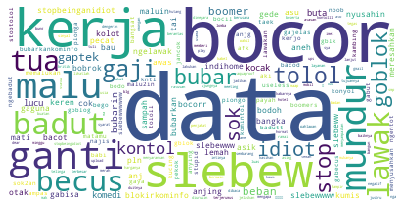

In [ ]:
myimage = calculate_frequencies(FILE_CONTENTS, UNINTERESTING_WORDS)
plt.figure(figsize = (7,7), facecolor = None)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

In [1]:
import operator

In [ ]:
word_count = []
for word, count in sorted(frequencies.items(), key=operator.itemgetter(1), reverse=True):
    if count >= 60:
        word_count.append([word, count])

In [ ]:
for i in word_count:
    print('{}, {}'.format(i[0], i[1]))

data, 17898
bocor, 16170
kerja, 6816
slebew, 5622
ganti, 3738
mundur, 3174
malu, 3138
badut, 2370
lawak, 2046
becus, 1992
tua, 1914
gaji, 1782
tolol, 1566
bubar, 1404
goblok, 1380
stop, 1356
idiot, 1344
sok, 1332
kontol, 1230
gaptek, 1218
beban, 1092
boomer, 1068
bubarin, 822
komedi, 732
lucu, 702
buta, 690
kocak, 678
gabisa, 576
blokirkominfo, 528
otak, 486
gede, 486
slebewww, 426
ngelawak, 420
bodoh, 420
slebeww, 408
stopbeinganidiot, 402
nyusahin, 396
bacot, 384
bangka, 366
cok, 348
anjing, 336
slebewwww, 318
kolot, 312
tai, 306
pecat, 306
keren, 294
gaguna, 270
sampah, 264
asik, 264
bubarkan, 258
bocorr, 246
aneh, 234
lemah, 234
pln, 228
bobrok, 210
mati, 210
maluin, 210
indihome, 204
bau, 204
anj, 204
kumis, 204
awas, 198
asu, 192
meresahkan, 186
bubarkankominfo, 186
memalukan, 180
gaya, 168
gajelas, 162
useless, 150
payah, 150
boomers, 150
sok2an, 150
babi, 138
bego, 126
gblk, 126
bodo, 126
bangsat, 126
goblog, 126
konyol, 126
gabecus, 126
ngentot, 120
kerjo, 120
afk, 120
lawakan

In [6]:
import csv

word_count.insert(0,["Words","Count"])

with open("word_statistics.csv","w") as statistics_file:
    writer = csv.writer(statistics_file)
    writer.writerows(word_count)
    statistics_file.close()

In [17]:
import plotly.graph_objects as go

statistics = pd.read_csv('word_statistics.csv')
y=statistics.Label.value_counts()
x=['opinion slammed', 'bukan perundungan', 'called name', 'threatened physical harm']

fig=go.Figure(data=[go.Bar(x=x,y=y,text=y, textposition='auto',)],
              layout=go.Layout(title=go.layout.Title(text='Kategori Kata Perundungan')))
fig.update_xaxes(title_text='Kategori Perundungan')
fig.update_yaxes(title_text='Jumlah Kata')
fig.show()